In [104]:
 import cv2
 import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
img = cv2.imread('image1.jpg')	


In [ ]:
cv2.imshow("img", img)
cv2.waitKey(0)

In [7]:
img

array([[[ 70, 107, 191],
        [ 83, 120, 204],
        [ 71, 108, 192],
        ...,
        [ 54,  77, 145],
        [ 56,  78, 144],
        [ 57,  79, 145]],

       [[ 74, 111, 195],
        [ 81, 118, 202],
        [ 74, 111, 195],
        ...,
        [ 56,  79, 147],
        [ 58,  80, 146],
        [ 59,  81, 147]],

       [[ 77, 115, 197],
        [ 76, 114, 196],
        [ 77, 114, 198],
        ...,
        [ 58,  81, 149],
        [ 57,  81, 147],
        [ 56,  80, 146]],

       ...,

       [[ 59,  89, 168],
        [ 60,  90, 169],
        [ 63,  93, 172],
        ...,
        [ 39,  39,  69],
        [ 39,  38,  70],
        [ 40,  39,  71]],

       [[ 59,  86, 166],
        [ 58,  88, 167],
        [ 61,  91, 170],
        ...,
        [ 37,  36,  68],
        [ 38,  37,  69],
        [ 42,  41,  73]],

       [[ 54,  81, 161],
        [ 57,  84, 164],
        [ 61,  91, 170],
        ...,
        [ 38,  37,  69],
        [ 40,  39,  71],
        [ 46,  45,  77]]

In [8]:
imgGray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [9]:
imgGray

array([[106, 119, 107, ...,  78,  79,  80],
       [110, 117, 110, ...,  80,  81,  82],
       [113, 112, 113, ...,  82,  81,  80],
       ...,
       [ 89,  90,  93, ...,  42,  42,  43],
       [ 87,  88,  91, ...,  40,  41,  45],
       [ 82,  85,  91, ...,  41,  43,  49]], dtype=uint8)

In [10]:
255-imgGray

array([[149, 136, 148, ..., 177, 176, 175],
       [145, 138, 145, ..., 175, 174, 173],
       [142, 143, 142, ..., 173, 174, 175],
       ...,
       [166, 165, 162, ..., 213, 213, 212],
       [168, 167, 164, ..., 215, 214, 210],
       [173, 170, 164, ..., 214, 212, 206]], dtype=uint8)

In [117]:
def imcomplement(I):
    return 255 - I

def show(I):
    cv2.imshow("img", I)
    cv2.waitKey(0)


In [22]:
imgCom = imcomplement(imgGray)

In [118]:
show(imgCom)

In [28]:
flipped = cv2.flip(img, 1)

In [119]:
show(flipped)

In [33]:
def flipud(I):
    return I[::-1]

In [34]:
imgFlipud = flipud(img)

In [120]:
show(imgFlipud)

In [36]:
def fliplr(I):
    return I[:, ::-1]

In [37]:
imgFliplr = fliplr(img)

In [121]:
show(imgFliplr)

In [40]:
imgGray.shape

(512, 512)

In [85]:
def imresize(I, size):
    x, y = size
    x_old, y_old = I.shape

    x_scale = x_old/x
    y_scale = y_old/y

    img = np.zeros((x, y), dtype=np.uint8)

    for i in range(x):
        for j in range(y):
            # img[i*x_scale:i*(x_scale) + x_scale, j*y_scale:j*(y_scale) + y_scale] = I[i, j]
            # print(img[i*x_scale:i*(x_scale) + x_scale, j*y_scale:j*(y_scale) + y_scale])
            img[i, j] = I[int(i*x_scale), int(j*y_scale)]

    return img



In [122]:
imgResize =  imresize(imgGray, (1024, 500))
show(imgResize)

In [88]:
rows,cols,ch = img.shape

In [109]:
def translation(I, x, y):
    rows,cols = I.shape
    M = np.float32([[1,0,x],[0,1,y]])
    dst = cv2.warpAffine(I,M,(cols,rows))
    return dst

def shearVer(I, x):
    rows,cols = I.shape
    M = np.float32([[1,x,0],[0,1,0]])
    dst = cv2.warpAffine(I,M,(cols,rows))
    return dst

def shearHor(I, x):
    rows,cols = I.shape
    M = np.float32([[1,0,0],[x,1,0]])
    dst = cv2.warpAffine(I,M,(cols,rows))
    return dst

def scaling(I, x, y):
    rows,cols = I.shape
    M = np.float32([[x,0,0],[x,y,0]])
    dst = cv2.warpAffine(I,M,(cols,rows))
    return dst

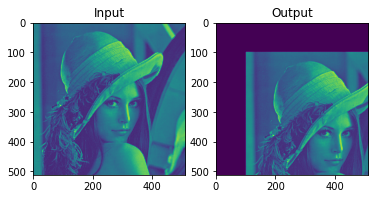

In [115]:
imgTran = translation(imgGray, 100, 100)
plt.subplot(121),plt.imshow(imgGray),plt.title('Input')
plt.subplot(122),plt.imshow(imgTran),plt.title('Output')
plt.show()


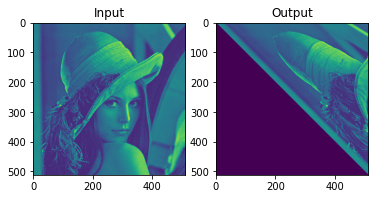

In [114]:

imgShearVer = shearVer(imgGray, 1)
plt.subplot(121),plt.imshow(imgGray),plt.title('Input')
plt.subplot(122),plt.imshow(imgShearVer),plt.title('Output')
plt.show()

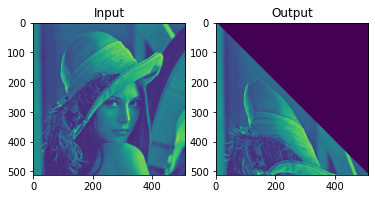

In [113]:

imgShearhor = shearHor(imgGray, 1)
plt.subplot(121),plt.imshow(imgGray),plt.title('Input')
plt.subplot(122),plt.imshow(imgShearhor),plt.title('Output')
plt.show()

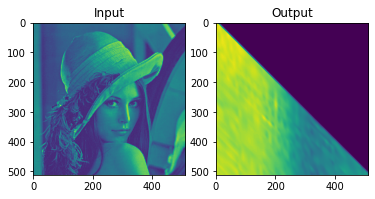

In [112]:
imgScale = scaling(imgGray, 10, 10)
plt.subplot(121),plt.imshow(imgGray),plt.title('Input')
plt.subplot(122),plt.imshow(imgScale),plt.title('Output')
plt.show()

In [129]:
inverted = cv2.bitwise_not(img)
flipped_x = cv2.flip(img, 0)
flipped_y = cv2.flip(img, 1)
resize = cv2.resize(img,(100, 100))

In [132]:
show(inverted)

In [133]:
show(flipped_x)

In [130]:
show(flipped_y)

In [131]:
show(resize)